## Digit Recognition using TensorFlow

### Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

### Data Exploration

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

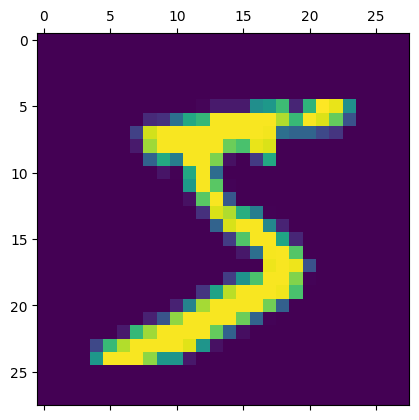

In [6]:
plt.matshow(X_train[0])
plt.show()

In [7]:
y_train[0]

5

### Data Pre-Processing

In [8]:
# min-max scaling
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_test_flattened.shape

(10000, 784)

### Model Building

In [11]:
# no hidden layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8082 - loss: 0.7271
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9128 - loss: 0.3138
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9216 - loss: 0.2813
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9247 - loss: 0.2712
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9249 - loss: 0.2666


In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9119 - loss: 0.3051


[0.2695128321647644, 0.9232000112533569]

In [13]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Confusion Matrix

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

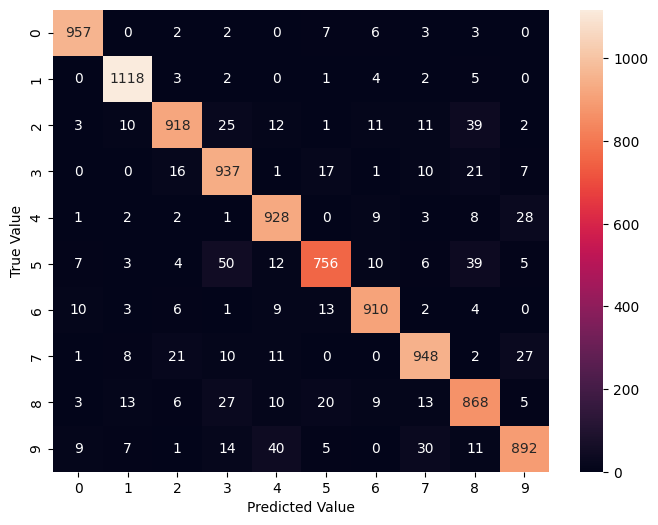

In [16]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

### Model Building - Hidden Layer with 100 Units

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8749 - loss: 0.4542
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9607 - loss: 0.1359
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9723 - loss: 0.0953
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9789 - loss: 0.0686
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9845 - loss: 0.0514


In [18]:
y_predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Sample Prediction

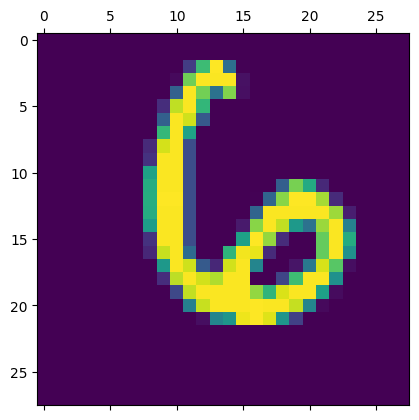

In [26]:
plt.matshow(X_test[88])
plt.show()

In [27]:
np.argmax(y_predicted[88])

6

### Confusion Matrix

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

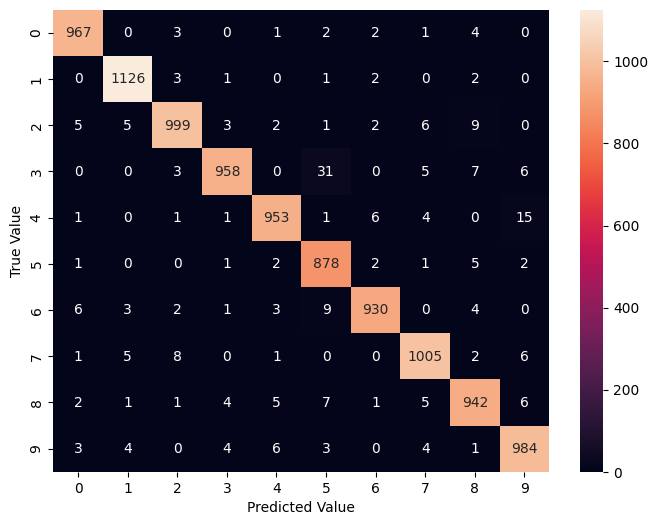

In [23]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()